# Data import

The data comes from: https://archive.ics.uci.edu/dataset/367/dota2+games+results



In [56]:
# Import data from UCI repository

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dota2_games_results = fetch_ucirepo(id=367) 
  
# data (as pandas dataframes) 
X = dota2_games_results.data.features 
y = dota2_games_results.data.targets 
  
# metadata 
print(dota2_games_results.metadata) 
  
# variable information 
print(dota2_games_results.variables) 

{'uci_id': 367, 'name': 'Dota2 Games Results', 'repository_url': 'https://archive.ics.uci.edu/dataset/367/dota2+games+results', 'data_url': 'https://archive.ics.uci.edu/static/public/367/data.csv', 'abstract': 'Dota 2 is a popular computer game with two teams of 5 players. At the start of the game each player chooses a unique hero with different strengths and weaknesses.', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 102944, 'num_features': 115, 'feature_types': [], 'demographics': [], 'target_col': ['win'], 'index_col': ['clusterid'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Sat Apr 13 2024', 'dataset_doi': '10.24432/C5W593', 'creators': ['Stephen Tridgell'], 'intro_paper': None, 'additional_info': {'summary': 'Dota 2 is a popular computer game with two teams of 5 players. At the start of the game each player chooses a unique hero with different strengths and wea

In [57]:
print(dota2_games_results.data.headers)

Index(['win', 'clusterid', 'gamemode', 'gametype', 'hero1', 'hero2', 'hero3',
       'hero4', 'hero5', 'hero6',
       ...
       'hero104', 'hero105', 'hero106', 'hero107', 'hero108', 'hero109',
       'hero110', 'hero111', 'hero112', 'hero113'],
      dtype='object', length=117)


# Alternatively load data from folder

The data was downloaded from the link above and saved in the folder `data`. The data is in the form of a `.csv` file. The data is loaded using the `pandas` library.

In [58]:
# Load the data into a pandas dataframe

import pandas as pd

train = pd.read_csv("../data/dota2Train.csv", names=dota2_games_results.data.headers)
test = pd.read_csv("../data/dota2Test.csv", names=dota2_games_results.data.headers)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92650 entries, 0 to 92649
Columns: 117 entries, win to hero113
dtypes: int64(117)
memory usage: 82.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10294 entries, 0 to 10293
Columns: 117 entries, win to hero113
dtypes: int64(117)
memory usage: 9.2 MB


In [59]:
train.head(5)

,win,clusterid,gamemode,gametype,hero1,hero2,hero3,hero4,hero5,hero6,...,hero104,hero105,hero106,hero107,hero108,hero109,hero110,hero111,hero112,hero113
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


In [60]:
test.head(1)

,win,clusterid,gamemode,gametype,hero1,hero2,hero3,hero4,hero5,hero6,...,hero104,hero105,hero106,hero107,hero108,hero109,hero110,hero111,hero112,hero113
0,-1,223,8,2,0,-1,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0


In [66]:
import json
import pandas as pd

# Load the JSON mappings
with open('../data/heroes.json', 'r') as f:
    heroes_data = json.load(f)['heroes']

with open('../data/lobbies.json', 'r') as f:
    lobbies_data = json.load(f)['lobbies']

with open('../data/mods.json', 'r') as f:
    mods_data = json.load(f)['mods']

with open('../data/regions.json', 'r') as f:
    regions_data = json.load(f)['regions']

# Create dictionaries to map ids to names
hero_dict = {hero['id']: hero['localized_name'] for hero in heroes_data}
hero_dict[24] = 'Hero24 (Unknown)' # Hero24 is missing from the JSON file
lobby_dict = {lobby['id']: lobby['name'] for lobby in lobbies_data}
mod_dict = {mod['id']: mod['name'] for mod in mods_data}
region_dict = {region['id']: region['name'] for region in regions_data}

# Copy the train dataset to avoid modifying the original dataset
train_desc = train.copy()

# Replace values in the dataset
train['gamemode'] = train_desc['gamemode'].map(mod_dict)
train['gametype'] = train_desc['gametype'].map(lobby_dict)
train['clusterid'] = train_desc['clusterid'].map(region_dict)

# Hero columns: Rename column name with hero name
hero_columns = [f'hero{i}' for i in range(1, 114)]
train_desc.rename(columns={col: hero_dict[int(col[4:])] for col in hero_columns}, inplace=True)

# Display the updated train dataset
train_desc.head()

,win,clusterid,gamemode,gametype,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,...,Legion Commander,Techies,Ember Spirit,Earth Spirit,Abyssal Underlord,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
0,-1,China,Captains Mode,Tournament,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Southeast Asia,Captains Mode,Tournament,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,Europe West,Captains Mode,Tournament,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,Southeast Asia,Captains Mode,Tournament,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,Australia,Captains Mode,Tutorial,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


### 1. Understand the Data Distribution:


**Visualize the Target Column (win/loss):**

The target column, `win`, is important for classification tasks. You can visualize its distribution to see if the dataset is balanced or imbalanced.

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

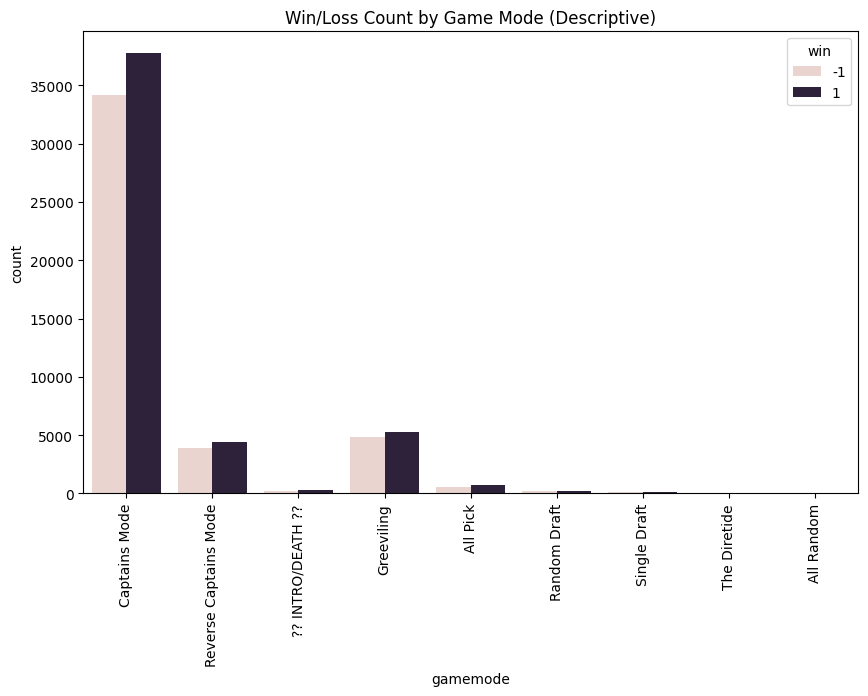

In [68]:
# Updated bar plot with game mode names
plt.figure(figsize=(10,6))
sns.countplot(x='gamemode', hue='win', data=train_desc)
plt.title('Win/Loss Count by Game Mode (Descriptive)')
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.show()

**Cluster Distribution:**

Since `clusterid` represents the location of the games, you can visualize its distribution to see where most games were played.

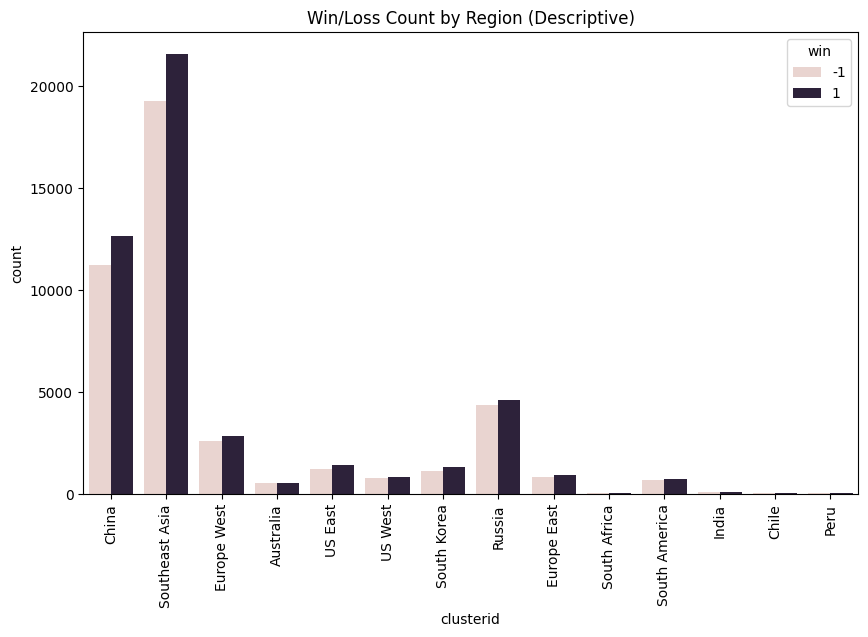

In [69]:
# Updated bar plot with cluster (region) names
plt.figure(figsize=(10,6))
sns.countplot(x='clusterid', hue='win', data=train_desc)
plt.title('Win/Loss Count by Region (Descriptive)')
plt.xticks(rotation=90)
plt.show()

### 2. Correlations Between Features:

To get a quick overview of how the game features and heroes interact, you can compute a correlation matrix.

This heatmap will give you an idea of how related certain features are, although the binary hero columns may not show strong correlations with the target.

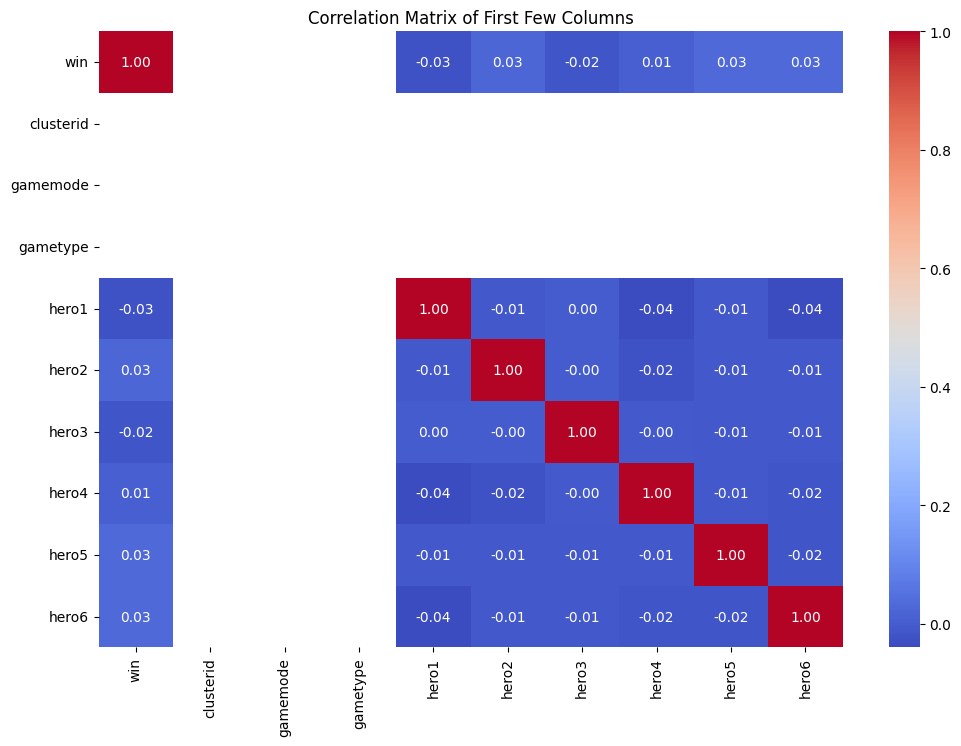

In [70]:
# Correlation heatmap of the first few columns
plt.figure(figsize=(12,8))
sns.heatmap(train.iloc[:, :10].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of First Few Columns')
plt.show()

### 3. Hero Selection Analysis:

Since each row contains information about which heroes were picked, you can explore which heroes are more frequently picked by visualizing their presence in games.

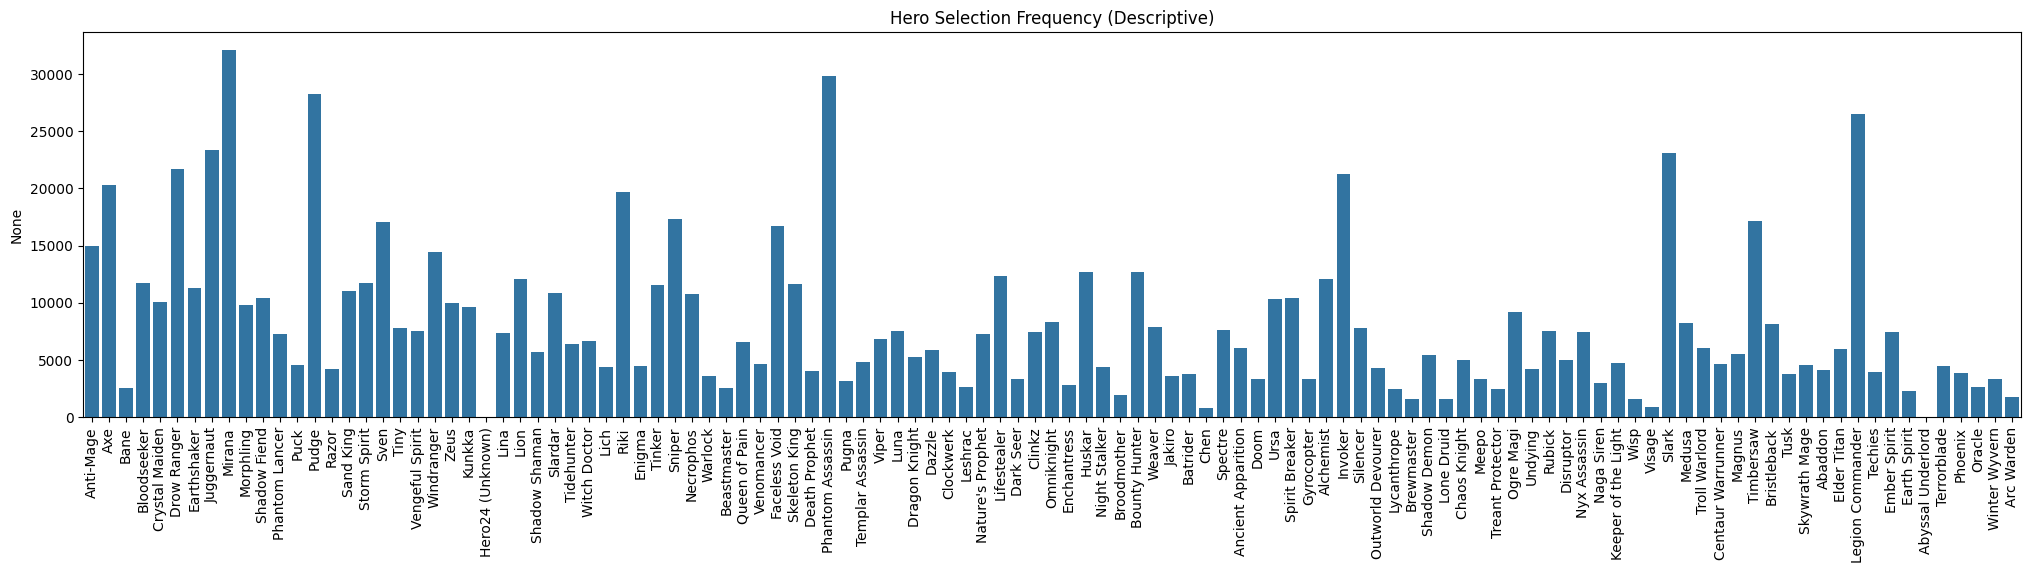

In [74]:
# Replace hero column values (1/-1) with hero names and plot hero selection frequencies
hero_counts = train[hero_columns].apply(lambda x: x.abs().sum(), axis=0)
hero_names = [hero_dict[int(hero.split('hero')[1])] for hero in hero_columns]

plt.figure(figsize=(25,5))
sns.barplot(x=hero_names, y=hero_counts)
plt.xticks(rotation=90)
plt.title('Hero Selection Frequency (Descriptive)')
plt.show()

### 4. Game Mode and Type Analysis:

You can visualize how different game modes and game types affect the win rate.

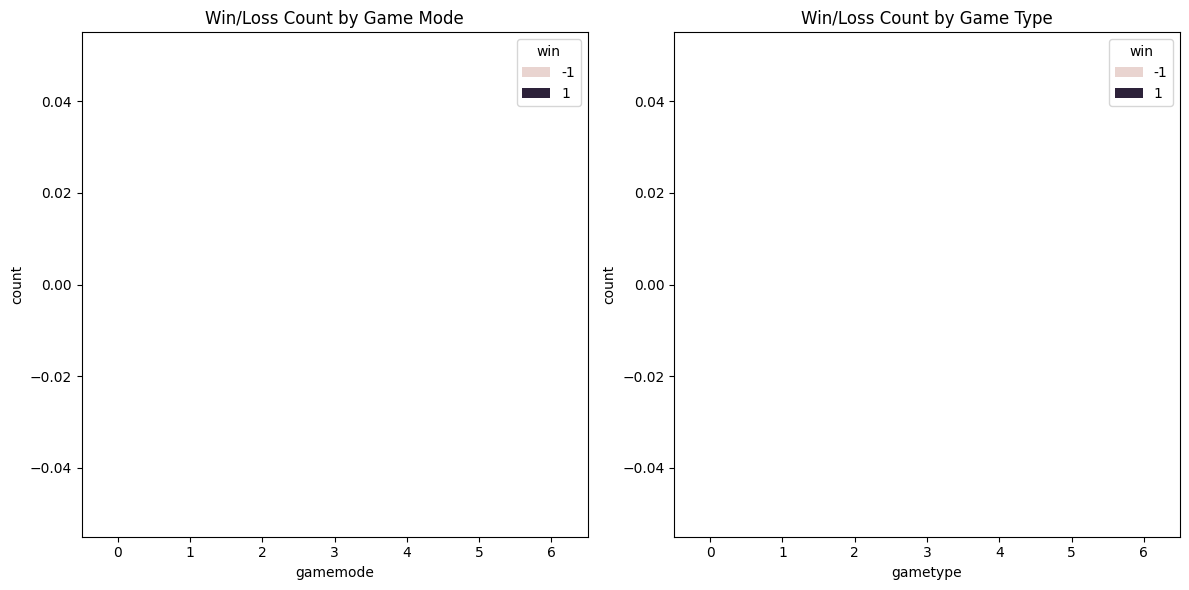

In [75]:
# Game mode and game type vs win
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x='gamemode', hue='win', data=train)
plt.title('Win/Loss Count by Game Mode')

plt.subplot(1,2,2)
sns.countplot(x='gametype', hue='win', data=train)
plt.title('Win/Loss Count by Game Type')

plt.tight_layout()
plt.show()

### 5. Dimensionality Reduction (Optional):

With such a high number of features (hero selections), dimensionality reduction techniques like PCA or t-SNE can help visualize the data in 2D or 3D space. This can be useful for identifying patterns or clusters.

This gives a more abstract, high-level view of the data.

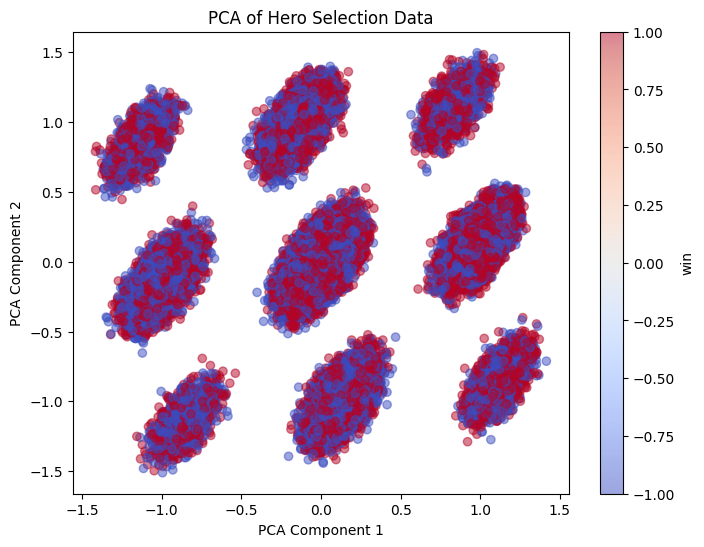

In [76]:
from sklearn.decomposition import PCA

# Performing PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train[hero_columns])

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train['win'], cmap='coolwarm', alpha=0.5)
plt.title('PCA of Hero Selection Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='win')
plt.show()

### 6. Train-Test Split Analysis:

Since you have training and test datasets, you can compare the distributions of these datasets to check for data leakage or inconsistencies. For example, visualize the target distribution in both sets to ensure they are similarly distributed:

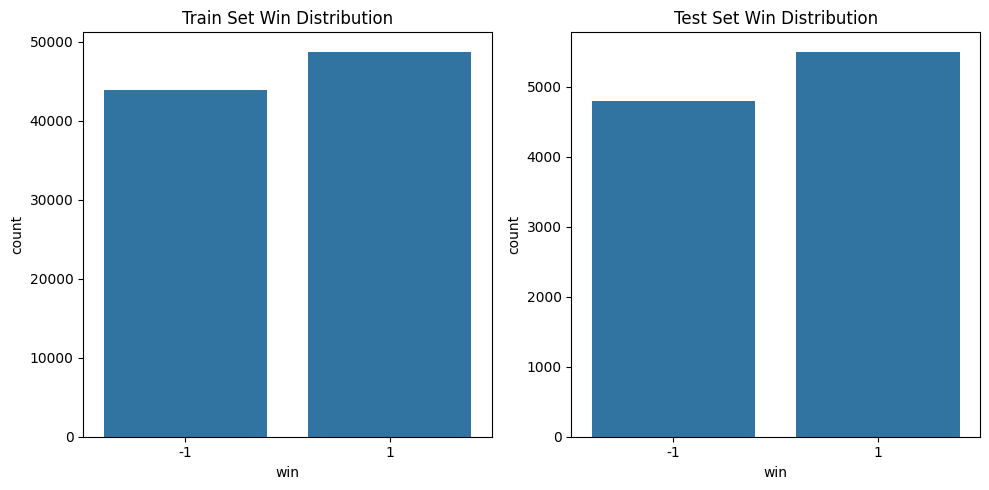

In [77]:
# Compare win distribution in train and test sets
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='win', data=train)
plt.title('Train Set Win Distribution')

plt.subplot(1,2,2)
sns.countplot(x='win', data=test)
plt.title('Test Set Win Distribution')

plt.tight_layout()
plt.show()

### 7. Feature Importance (Using a Simple Model):

Finally, you can train a simple model, like a decision tree or random forest, and check which features are most important for predicting the target.

This will give you an idea of which heroes or features are most predictive of the game's outcome.

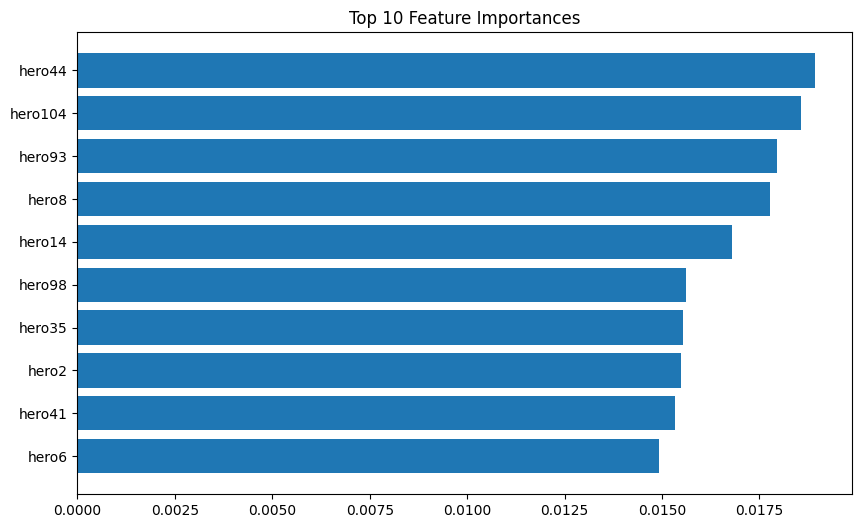

In [78]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Splitting the data
X_train = train.drop(columns=['win', 'clusterid'])
y_train = train['win']

# Train a simple RandomForest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Visualizing feature importance
importance = model.feature_importances_
indices = np.argsort(importance)[-10:]

plt.figure(figsize=(10,6))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.show()